<font size=6>

<b>Taller de Análisis de Datos</b>
</font>

<font size=4>
    
InpsiraSTEM 2025 <br/>
25 de Julio de 2025

</font>

https://github.com/michaelsanchez2025/inspirastem2025-data-analisis/

<br/>

# Día 3 - Análisis exploratorio (EDA) y pre-procesado de datos

Lo más importante a la hora de analizar datos y trabajar con datasets es disponer de unos buenos datos. No solo tienen que ser lo suficientemente representativos para satisfacer nuestros objetivos, si no que también requieren de un pre-procesado para limpiarlos, reescalarlos, agruparlos, convertir a un formato específico, etc. y así evitar errores en los resultados o resultados poco fidedignos.

## Objetivos

- Identificar y limpiar los datos de valores _omitidos_
- Estandarizar el formato de los datos
- Normalizar los valores de los que disponemos
- Agrupar valores (_binning_)
- Variables categóricas y variables numéricas
- Explorar los datos de los que disponemos
- Encontrar relación entre las distintas variables
- Identificación de _outliers_


## Importación de librerías


In [1]:
!git clone https://github.com/michaelsanchez2025/inspirastem2025-data-analisis/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

Cloning into 'inspirastem2025-data-analisis'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 185 (delta 20), reused 2 (delta 2), pack-reused 147 (from 1)
Receiving objects: 100% (185/185), 3.05 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (69/69), done.


##  Estadística descriptiva


Es importante explorar nuestros datos antes de empezar a hacer cálculos complicados con ellos.
Una vez que tenemos nuestros datos guardados en un dataset podemos aplicar distintos métodos para tener una primera idea del tamaño, rango y otras medidas estadísticas de interés, tales como el valor medio, máximos, mínimos, etc., que luego podemos necesitar para pre-procesar nuestros datos.

La estadística descriptiva ayuda a describir las características básicas de un conjunto de datos de manera rápida.

El modo más común de obtener estos datos es la función `df.describe()` de Pandas aplicada a nuestro dataset.

In [2]:
## EJEMPLO COCHES

coches = pd.read_csv('inspirastem2025-data-analisis/data/auto-mpg.data',sep='\s+', header=None)
coches.columns = ['mpg','cylinders','displacement','horsepower','weight',
                  'acceleration','model_year','origin','car_name']
coches = coches.replace('?', np.nan).dropna().reset_index(drop=True)
coches.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
coches.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Esta función muestra estadísticas básicas de cada variable, tales como la media, el total de datos, la desviación estandar, los cuartiles y el máximo y mínimo.




También podemos usar la función `.info()` que nos dará otro tipo de información, como el rango del índice de nuestros datos (número de filas) y datos de nuestras columnas, como el tipo de datos

In [4]:
## EJEMPLO TRABAJADORES EMPRESA
datos = [
    {'Nombre': 'Juan', 'Sexo':'Hombre','Edad': 42, 'Departamento': 'Comunicación'},
    {'Nombre': 'Laura', 'Sexo':'Mujer','Edad': 44, 'Departamento': 'Administración'},
    {'Nombre': 'Pepe', 'Sexo':'Hombre','Edad': 37, 'Departamento': 'Ventas'},
    {'Nombre': 'Carlos', 'Sexo':'Hombre','Edad': 15, 'Departamento': 'Ventas'},
    {'Nombre': 'Esther', 'Sexo':'Mujer','Edad': 62, 'Departamento': 'Administración'},
    {'Nombre': 'Álvaro', 'Sexo':'Hombre','Edad': 62, 'Departamento': 'Ventas'},
    {'Nombre': 'Rosa', 'Sexo':'Mujer','Edad': 50, 'Departamento': 'Comunicación'},

]

empresa = pd.DataFrame(datos)
empresa

,Nombre,Sexo,Edad,Departamento
0,Juan,Hombre,42,Comunicación
1,Laura,Mujer,44,Administración
2,Pepe,Hombre,37,Ventas
3,Carlos,Hombre,15,Ventas
4,Esther,Mujer,62,Administración
5,Álvaro,Hombre,62,Ventas
6,Rosa,Mujer,50,Comunicación


In [5]:
empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nombre        7 non-null      object
 1   Sexo          7 non-null      object
 2   Edad          7 non-null      int64 
 3   Departamento  7 non-null      object
dtypes: int64(1), object(3)
memory usage: 356.0+ bytes


Aunque para saber las dimensiones de nuestro dataset la manera más rápida es usar la función `.shape` que nos devuelve dos números, el primero es el número de filas y el segundo el número de columnas.

In [6]:
empresa.shape

(7, 4)

Dos funciones útiles para conocer los valores que tenemos en nuestras columnas son `value_counts`, y `unique`, especialmente para el caso de variables categóricas.

La función `df.columna.unique()` nos indica los valores únicos presentes. La función `df.columna.value_counts()` nos dice cuántas veces se repite cada valor.

In [7]:
empresa.Departamento.unique()  # O: pd.unique(empresa.Departamento)

array(['Comunicación', 'Administración', 'Ventas'], dtype=object)

In [8]:
empresa.Departamento.value_counts()

,count
Departamento,
Ventas,3
Comunicación,2
Administración,2


<p/>

### Histogramas

Una forma gráfica de ver la distribución de nuestros datos es crear un **histograma**.

In [9]:
## EJEMPLO Coches CO2 emissions
df4 = pd.read_csv("inspirastem2025-data-analisis/data/FuelConsumption.csv")
coches2 = df4[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
coches2 ## Datasat reducido con variables de interés

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


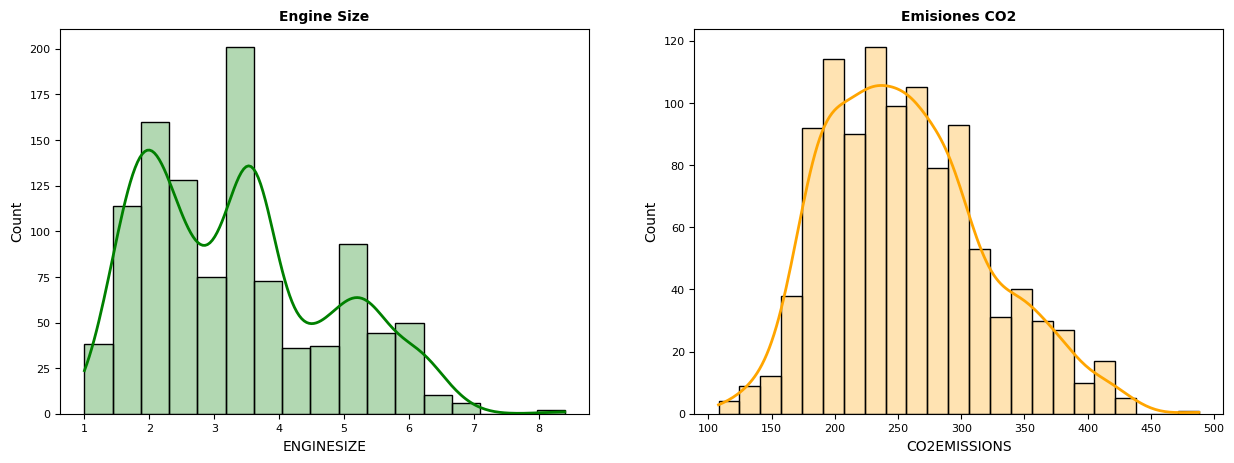

In [10]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(
        data    = coches2,
        x       = 'ENGINESIZE',
        stat    = "count",
        kde     = True,
        color   = 'green',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,  # transparency
        ax      = axes[0])
axes[0].set_title('Engine Size', fontsize = 10, fontweight = "bold")
axes[0].tick_params(labelsize = 8)


sns.histplot(
        data    = coches2,
        x       = 'CO2EMISSIONS',
        stat    = "count",
        kde     = True,
        color   = 'orange',
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[1])
axes[1].set_title('Emisiones CO2', fontsize = 10, fontweight = "bold")
axes[1].tick_params(labelsize = 8)

### Boxplots

El diagrama de cajas o *boxplot* es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos y también pueden representarse sus valores atípicos.
También proporcionan una visión general de la simetría de la distribución de los datos; si la mediana no está en el centro del rectángulo, la distribución no es simétrica.

Usaremos la librería seaborn para construir los diagramas de cajas, más concretamente la función [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Si lo que queremos es agrupar los datos dependiendo de otra variable, la definiremos en el eje x

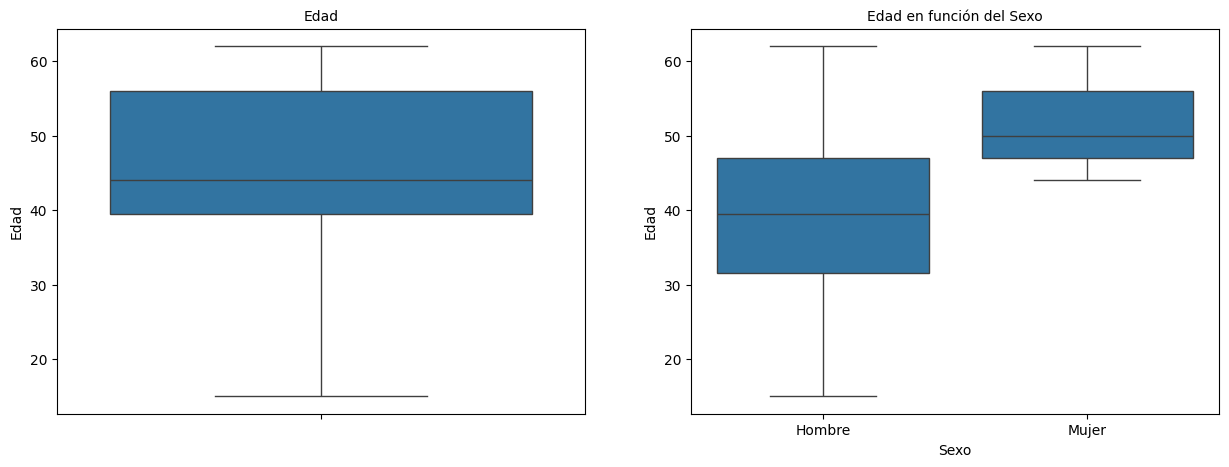

In [11]:
## Boxplot vertical
figure,axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(y=empresa.Edad, data=empresa, ax=axes[0])
axes[0].set_title('Edad',fontsize = 10)

sns.boxplot(x=empresa.Sexo, y=empresa.Edad, data=empresa, ax=axes[1])
axes[1].set_title('Edad en función del Sexo',fontsize = 10);

<p/>

<div style="background-color:powderblue;">

**EJERCICIO 1:**

Dado el dataset `ejer_titanic` visualizar usando un boxplot la edad de mujeres y hombres que había en el titanic, clasificados por la clase en la que viajaban.
    
- Pista: usar el argumento `hue` con la función `boxplot` de `seaborn`.

In [12]:
## EJEMPLO Dataset Titanic
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##  Valores ausentes
Podemos encontrarnos con que faltan valores en nuestros datasets, esto puede deberse a que no se han guardado algunas variables de un evento, y podemos encontrarlos representados de diferentes maneras (p. ej. 0, NaN, espacios en blanco, o símbolos de puntuación).

Primero, es necesario detectar si tenemos valores nulos u omitidos en nuestro dataset y eso lo podemos hacer usando la función de pandas `.isnull()`. También podemos combinarla con el método `.any` que nos dirá si hay algún nulo o ninguno.


In [14]:
## EJEMPLO Dataset Titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.shape

(891, 15)

In [16]:
titanic.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [17]:
# Hay algún nulo en mis columnas?
titanic.isnull().any()

,0
survived,False
pclass,False
sex,False
age,True
sibsp,False
parch,False
fare,False
embarked,True
class,False
who,False


In [18]:
# Hay algún nulo en todo el DataFrame?
titanic.isnull().any().any()

np.True_

<p/>

También podemos contar el número exacto de datos nulos por columna.

In [19]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0



Se pueden considerar diferentes estrategias para enfrentarnos a estos valores omitidos y eso va a depender de la situación, el tipo de dato y la experiencia del investigador. Los distintos métodos para solucionar los espacios en blanco son los siguientes:

- Revisar los datos e intentar recuperar el valor desconocido.
- Eliminar los datos omitidos
    - Eliminar la variable entera
    - Eliminar esa entrada de datos (la fila)
- Sustituir valores
    - Variables numéricas:
        - Reemplazarlos por la media de la variable
    - Variables categóricas:
        - Reemplazarlos por la moda   
        - Reemplazar los valores basándonos en conocimiento previo
- Dejar en blanco los valores que faltan

### Eliminar los datos omitidos


Pandas tiene una función que se encarga de eliminar datos que no son válidos o en blanco: `df.dropna()`

Es necesario especificar el eje que queremos eliminar:
- `axis=0` elimina la fila entera, la entrada que presenta problemas
- `axis=1` elimina la columna, la variable

Otros de los parámetros de la función que hay que configurar son la columna en la que se encuentra el NaN y si queremos mantener el índice cuando eliminemos los datos vacíos.



In [20]:
del_titanic = titanic.copy()

# Borramos las filas (axis=0) que tengan NaN en la columna 'deck' (subset)
del_titanic.dropna(subset=['deck'], axis=0, inplace=True)
del_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [21]:
del_titanic.shape

(203, 15)

In [22]:
del_titanic.deck.isnull().sum()

np.int64(0)

Hemos borrado las filas con NaN en la columna 'deck', pero sigue habiendo Nan en otras columnas.

In [23]:
del_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,19
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [24]:
# Ahora orramos en todo el Dataframe
del_titanic_2 = titanic.dropna(axis=0)
del_titanic_2.shape

(182, 15)

In [25]:
del_titanic_2.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


<br/>

Al eliminar filas, nuestro índice tiene ahora valores no consecutivos.

In [26]:
del_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [27]:
# Podemos reiniciar el índice para que tenga valores consecutivos
del_titanic.reset_index(drop=True, inplace=True)
del_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
199,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
200,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
201,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### Sustituir valores

Para sustituir un dato vacío por otro valor se puede usar la función `df.replace(valor_omitido, nuevo_valor)`.

También existe una función especifica para los valores omitidos:`df.fillna(nuevo_valor)`

Pongamos que el ejemplo del dataset anterior queremos reemplazar el valor NaN por el valor de la columna `deck` que más veces se repite, o lo que es lo mismo, la _moda_.

Primero habría que calcular la moda con `df.col.mode()`

In [28]:
## Hallamos la moda
md = titanic.deck.mode()[0]
md

'C'

In [29]:
## Sustituimos valores NaN por la moda hallada
md_titanic = titanic.copy()
md_titanic.deck = md_titanic['deck'].fillna(md)
md_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [30]:
# Vemos que los NaN han desaparecido
md_titanic.deck.isnull().sum()

np.int64(0)

In [31]:
# Ahora hay muchas 'C'
md_titanic.deck[md_titanic.deck=='C'].count()

np.int64(747)

In [32]:
# Pero todavía tenemos NaN en algunas otras columnas
md_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [33]:
# En el caso de la columna 'age', vamos a aplicar la función 'replace', para cambiarlos por 0s
# La situación inicial es que hay varios NaN, pero ningún valor 0
print('Num. filas con age==NaN -->', md_titanic.age.isnull().sum())
print('Num. filas con age==0 -->', md_titanic.age[md_titanic.age == 0].count())

Num. filas con age==NaN --> 177
Num. filas con age==0 --> 0


In [34]:
# Hacemos el cambio
md_titanic.age = md_titanic.age.replace(np.nan, 0)

In [35]:
# Y vemos sus efectos
print('Num. filas con age==NaN -->', md_titanic.age.isnull().sum())
print('Num. filas con age==0 -->', md_titanic[md_titanic.age == 0].age.count())


Num. filas con age==NaN --> 0
Num. filas con age==0 --> 177


<p/>

<div style="background-color:powderblue;">

**EJERCICIO 2:**

Dado el dataset `ejer2` remplaza los NaN de cada columna por la media de su correspondiente columna.

In [36]:
import pandas as pd
ejer2 = pd.DataFrame({'a':[None, 3, None, 5, 6], 'b':[1, 3, 4, 6, None], 'c':[54, None, None, 32, 21]})
ejer2.head()

,a,b,c
0,NaN,1.0,54.0
1,3.0,3.0,NaN
2,NaN,4.0,NaN
3,5.0,6.0,32.0
4,6.0,NaN,21.0


## Formateo de datos

Puede darse el caso de que recolectemos datos de distintas fuentes, o que los registren diferentes personas por lo que los datos pueden presentar distintas nomenclaturas o no ser constantes en términos de unidades y formatos. En este caso resulta difícil comparar los datos o agruparlos por lo que es necesario formatearlos y definir un formato único que haga más fácil las futuras operaciones.

En el caso en que se requiera una conversión de unidades, por ejemplo pasar los datos de peso de libras a kg, debemos dividir las libras entre 0,45359237. Podemos modificar la columna `libras` de la siguiente manera:

`df['libras'] = df['libras']/0.45359237`

Conviene en este caso renombrar la columna:

`df.rename(columns={'libras':'kilogramos'}, inplace=True)`

Es importante prestar atención al tipo de datos que tenemos. Si no son los correctos puede haber errores en las operaciones cuando construyamos modelos.

Cuando introducimos datos en python puede ocurrir que se registren como un tipo distinto al que deseamos. Es necesario comprobar el tipo de datos y ver si se corresponden con lo que debería ser para que no interfiera en nuestros futuros cálculos, si este no fuera el caso, se debe de cambiar el tipo de datos.

Para identificar qué tipos de datos tenemos usamos la función `dtypes`

In [38]:
coches.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [39]:
coches.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,float64
acceleration,float64
model_year,int64
origin,int64
car_name,object


In [40]:
coches.horsepower[0]

'130.0'

Para cambiar el tipo de una columna se puede usar la función `astype` especificando el tipo al que vamos a convertir la variable:

In [41]:
# Cambiamos todas las columnas numéricas a float
coches.iloc[:,:-1] = coches.iloc[:,:-1].astype(float)
coches.dtypes

/tmp/ipython-input-41-1947909941.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
387    4.0
388    4.0
389    4.0
390    4.0
391    4.0
Name: cylinders, Length: 392, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coches.iloc[:,:-1] = coches.iloc[:,:-1].astype(float)
/tmp/ipython-input-41-1947909941.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
       ... 
387    82.0
388    82.0
389    82.0
390    82.0
391    82.0
Name: model_year, Length: 392, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coches.iloc[:,:-1] = coches.iloc[:,:-1].astype(float)
/tmp/ipython-input-41-1947909941.py:2: FutureWarning: 

,0
mpg,float64
cylinders,float64
displacement,float64
horsepower,object
weight,float64
acceleration,float64
model_year,float64
origin,float64
car_name,object


In [42]:
coches.horsepower[0]

130.0

NOTA: Un caso particular a tener en cuenta es si una columna con valores numéricos tiene tipo `object`. Eso suele provenir de un error de importación de los datos, que se han considerado _string_, y dará problemas en futuras operaciones matemáticas. Se debe corregir con `astype`.

<div style="background-color:powderblue;">

**EJERCICIO 3:**

Convertir la columna `mpg` (_miles per gallon_) del dataframe `ejer_coches` a litros cada 100km.
    
La fórmula a sefuir es la siguiente $L/100km = 235 / m.p.g.$

Cambiar el nombre de la columna a `L/100km`

Comprobar el tipo de la columna modificada

In [43]:
ejer_coches = coches.copy()
ejer_coches.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Normalización

Muchas veces, dependiendo de la naturaleza de los datos, nos encontramos con que hay gran variación de rango entre una columna y otra. Por ejemplo en el siguiente dataframe de casas, entre el precio y el número de habitaciones.

In [44]:
## EJEMPLO CASAS
casas = pd.read_csv('inspirastem2025-data-analisis/data/kc_house_data.csv', header='infer')
casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503



En estos casos puede venir bien normalizar nuestros datos. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido y hacer que los datos sean más uniformes, para facilitar futuros cálculos estadísticos con nuestro dataset.

La normalización hace posible la comparación entre distintas variables (_features_) y hace que todas tengan el mismo impacto en los cálculos.

Pero no existe un método ideal de normalización que funcione para todas las formas de variables. Es trabajo del científico conocer cómo se distribuyen los datos, saber si existen anomalías, comprobar rangos, etc.

Hay varios métodos para normalizar, pero a continuación explicaremos tres y veremos cómo se implementan en Python.

### Escalado de variables (Feature Scaling):

#### Simple

  
  
  

$$x_{new} = \frac{x_{old}}{x_{max}}$$

Se divide cada valor por el máximo valor de esa variable. El nuevo rango de la variable es entre [0,1].

Esto aplicado a nuestro dataset sería de la siguiente forma:


In [45]:
var = casas['price']
var.max()

7700000.0

In [46]:
price_norm_max = var / var.max()
price_norm_max

,price
0,0.028818
1,0.069870
2,0.023377
3,0.078442
4,0.066234
...,...
21608,0.046753
21609,0.051948
21610,0.052221
21611,0.051948


In [47]:
price_norm_max.min()

0.00974025974025974

#### Min-Max


$$x_{new} = \frac{x_{old} - x_{min}}{x_{max}- x_{min}}$$

El nuevo valor es el resultado de dividir la diferencia entre el valor original menos el valor mínimo, por el rango de dicha variable (máximo - mínimo). El nuevo rango de la variable será también [0,1].

Siguiendo el ejemplo anterior pero aplicando la normalización Min-Max:

In [48]:
price_norm_minmax = (var - var.min()) / (var.max() - var.min())
price_norm_minmax.describe()

,price
count,21613.000000
mean,0.060995
std,0.048148
min,0.000000
25%,0.032387
50%,0.049180
75%,0.074754
max,1.000000


### Escalado estándar (Z-score)

Otra forma de normalización es la llamada _Z-score_, que es una medida de cuántas desviaciones estándar por debajo o por encima de la media se encuentra un valor concreto.

Se calcula restando la media y dividiendo por la deviación estándar.

$$x_{new} = \frac{x_{old} - \mu }{\sigma}$$

Un valor Z de cero indica que los valores son exactamente la media, mientras que un valor de +3 indica que el valor es mucho más alto que la media.

En una distribución gaussiana nos indica también en qué percentil de la distrubución nos encontramos. En ese casi todos los valores normalizados quedarán dentro del rango [-3, 3].

<center>
<img src="https://github.com/michaelsanchez2025/inspirastem2025-data-analisis/blob/main/images/t7_zscore.jpg?raw=1" alt="Drawing" style="width: 250px;"/>
</center>

In [49]:
var = coches2['CO2EMISSIONS']
co2_norm_zscore = (var - var.mean()) / var.std()
co2_norm_zscore

,CO2EMISSIONS
0,-0.950394
1,-0.555900
2,-1.897180
3,-0.019388
4,-0.192966
...,...
1062,0.233088
1063,0.122630
1064,0.233088
1065,0.059511


También la librería Scipy nos ofrece una fórmula que nos lo calcula directamente: `stats.zscore()`

In [50]:
from scipy import stats

ZS = stats.zscore(var, ddof=1)
print(ZS[0:10])

[-0.95039433 -0.55590023 -1.89718016 -0.01938826 -0.19296566 -0.41388235
 -0.38232283 -0.01938826  0.16996891 -0.6979181 ]


<p/>

<div style="background-color:powderblue;">

**EJERCICIO 4:**

Normaliza el dataset ejer_coches2 utilizando la función Min-Max. Cada columna debe ir normalizada usando el máximo y mínimo correspondiente.

Comprobar que los valores resultantes están en el rango [0,1]

In [51]:
ejer_coches2 = coches2.copy()
ejer_coches2


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## Discretización (Binning)

_Binning_ es la división de los datos en grupos (_bins_), en base un criterio dado (p. ej., rangos de valores en alguna de las variables).

Al crear un histograma, por ejemplo, se hace un binado implícito. la altura de cada barra mostrada se hace de acuerdo al número de registros que _caen_ dentro de cada _bin_.

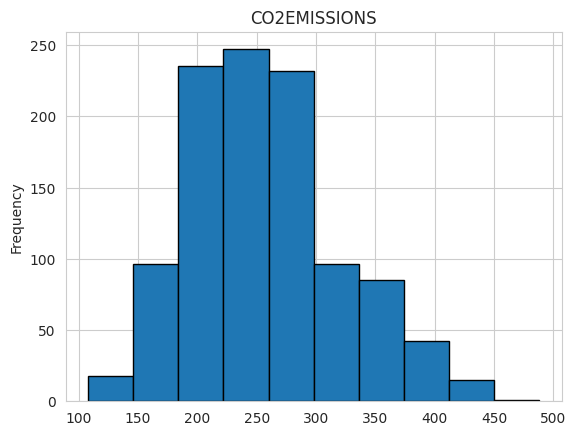

In [52]:
import seaborn as sns

sns.set_style('whitegrid')
coches2['CO2EMISSIONS'].plot(kind='hist',edgecolor='black', bins=10, title='CO2EMISSIONS');

<p/>

Existen dos funciones en pandas que se usan para dividir nuestros datos en bins: `cut` y `qcut`.

Veamos primero `cut`:

- [`cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html): Divide las muestras en intervalos indicados explícitamente, o para un número total de _bins_ del mismo tamaño. La función sobre una serie de valores devuelve el intervalo que corresponde a cada posición del índice original.   

In [53]:
# Valores
coches2['CO2EMISSIONS'].head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [54]:
coches2.shape[0]

1067

In [55]:
# Bin para cada valor
pd.cut(coches2['CO2EMISSIONS'], bins=4).head()

,CO2EMISSIONS
0,"(107.62, 203.0]"
1,"(203.0, 298.0]"
2,"(107.62, 203.0]"
3,"(203.0, 298.0]"
4,"(203.0, 298.0]"


In [56]:
# Con 'value_counts' podemos obtener las frecuencias por bin (histograma)
pd.cut(coches2['CO2EMISSIONS'], bins=4).value_counts()

,count
CO2EMISSIONS,
"(203.0, 298.0]",581
"(107.62, 203.0]",247
"(298.0, 393.0]",212
"(393.0, 488.0]",27


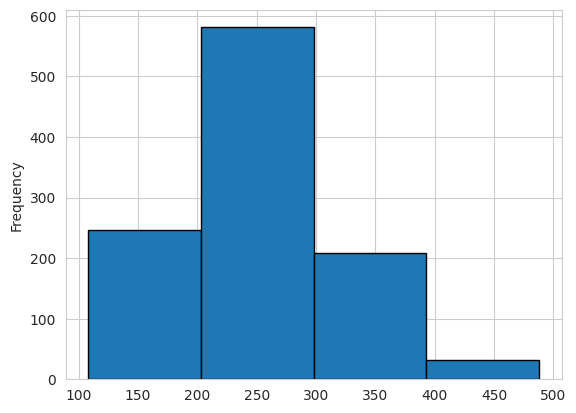

In [57]:
coches2['CO2EMISSIONS'].plot.hist(bins=4,edgecolor='black');

Con el argumento 'retbins' obtenemos los valores utilizados para dividir los intervalos.

In [58]:
h, bins = pd.cut(coches2['CO2EMISSIONS'], bins=4, retbins=True)
bins

array([107.62, 203.  , 298.  , 393.  , 488.  ])

Podemos comprobar que los intervalos tienen todos la misma longitud.

In [59]:
bins[1:]-bins[:-1]

array([95.38, 95.  , 95.  , 95.  ])

Veamos finalmente un ejemplo de `cut` con bins especificados explícitamente (y tamaños irregulares)

In [60]:
bins = pd.IntervalIndex.from_tuples([(0.0, 90.0), (91.0,251.0), (252.0, 488.0)])

pd.cut(coches2['CO2EMISSIONS'], bins).value_counts()

,count
CO2EMISSIONS,
"(91.0, 251.0]",545
"(252.0, 488.0]",522
"(0.0, 90.0]",0


<p/>

Veamos ahora `qcut`:

- [`qcut`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
La documentación de pandas describe `qcut` como una "función de discretización basada en cuantiles". `qcut` calculará el tamaño de cada bin para asegurarse de que la distribución en los bins es la misma (más o menos) en todos ellos. En general, los bins no serán de igual tamaño, el rango variará, pero todos tendrán el mismo número de observaciones.

In [61]:
h, bins = pd.qcut(coches2['CO2EMISSIONS'], q=5, retbins=True)
h

,CO2EMISSIONS
0,"(107.999, 198.0]"
1,"(198.0, 232.0]"
2,"(107.999, 198.0]"
3,"(232.0, 264.6]"
4,"(232.0, 264.6]"
...,...
1062,"(264.6, 307.6]"
1063,"(232.0, 264.6]"
1064,"(264.6, 307.6]"
1065,"(232.0, 264.6]"


Ahora tendremos intervalos irregulares, pero poblaciones por bines aproximadamente iguales

In [62]:
bins[1:]-bins[:-1]

array([ 90. ,  34. ,  32.6,  43. , 180.4])

In [63]:
h.value_counts()

,count
CO2EMISSIONS,
"(107.999, 198.0]",222
"(307.6, 488.0]",214
"(198.0, 232.0]",213
"(264.6, 307.6]",213
"(232.0, 264.6]",205


In [64]:
# Ahora especificamos los cuantiles, en lugar del número de ellos
h2, bins = pd.qcut(coches2['CO2EMISSIONS'], q=[0, 0.25, 0.5, 0.75, 1], retbins=True)
bins

array([108., 207., 251., 294., 488.])

In [65]:
h2.value_counts()

,count
CO2EMISSIONS,
"(207.0, 251.0]",276
"(251.0, 294.0]",271
"(107.999, 207.0]",269
"(294.0, 488.0]",251


In [66]:
# Comparamos con lo que nos muestra 'describe'
coches2['CO2EMISSIONS'].describe()

,CO2EMISSIONS
count,1067.000000
mean,256.228679
std,63.372304
min,108.000000
25%,207.000000
50%,251.000000
75%,294.000000
max,488.000000


<p/>

Además de para conocer mejor la distribución de nuestros datos, otra aplicación posible del binado es la de poner etiquetas a los distintos grupos y convertir variables numéricas en variables categóricas.

Por ejemplo, usando `cut` podemos clasificar los coches del ejemplo anterior en función de su nivel de emisión de CO2.

In [67]:
labels_emissions = ['Muy poco', 'Poco', 'Normal', 'Mucho']
clasif = pd.cut(coches2['CO2EMISSIONS'], bins=4, labels=labels_emissions)
clasif.head()

,CO2EMISSIONS
0,Muy poco
1,Poco
2,Muy poco
3,Poco
4,Poco


In [68]:
coches2['Contamina'] = clasif
coches2

/tmp/ipython-input-68-265404905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coches2['Contamina'] = clasif


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,Contamina
0,2.0,4,8.5,196,Muy poco
1,2.4,4,9.6,221,Poco
2,1.5,4,5.9,136,Muy poco
3,3.5,6,11.1,255,Poco
4,3.5,6,10.6,244,Poco
...,...,...,...,...,...
1062,3.0,6,11.8,271,Poco
1063,3.2,6,11.5,264,Poco
1064,3.0,6,11.8,271,Poco
1065,3.2,6,11.3,260,Poco


<p/>

<div style="background-color:powderblue;">
    
**EJERCICIO 5:**

Clasifica a los trabajadores de una empresa en grupos de edad (categóricos) usando la función cut.


In [69]:
ejer_edad = empresa.copy()
ejer_edad

,Nombre,Sexo,Edad,Departamento
0,Juan,Hombre,42,Comunicación
1,Laura,Mujer,44,Administración
2,Pepe,Hombre,37,Ventas
3,Carlos,Hombre,15,Ventas
4,Esther,Mujer,62,Administración
5,Álvaro,Hombre,62,Ventas
6,Rosa,Mujer,50,Comunicación


## Variables categóricas y variables numéricas

Para poder hacer operaciones sobre nuestros datos o construir modelos (clases de Python que representan funciones matemáticas, p. ej. una regresión lineal) normalmente requerimos variables numéricas. Por lo tanto, cuando tenemos variables categóricas tenemos que realizar una conversión previa.

Existen diferentes métodos para hacer esta conversión de categórico a numérico.

### Convención

Se puede establecer un código para poner etiquetas a las distintas categorias que tengamos de forma manual, por ejemplo, si quisieramos cambiar la variable `Sexo` del siguiente dataset a numérico, podríamos acordar que `Mujer` se representa por `1` y `Hombre` por `2`.


Nombre | Sexo | Sexo_num
:--------: | ------- | --------
Juan | Hombre | 2
Laura| Mujer | 1
Pepe| Hombre | 2
Carlos| Hombre | 2
Esther | Mujer | 1
Álvaro | Hombre | 2
Rosa | Mujer | 1


De este modo tendríamos la variable convertida a numérico. El código para conseguirlo sería el siguiente:

In [70]:
empresa["Sexo_num"] = empresa.apply(lambda x: 1 if x["Sexo"] == 'Mujer' else 2, axis=1)
empresa[['Nombre','Sexo','Sexo_num']]

,Nombre,Sexo,Sexo_num
0,Juan,Hombre,2
1,Laura,Mujer,1
2,Pepe,Hombre,2
3,Carlos,Hombre,2
4,Esther,Mujer,1
5,Álvaro,Hombre,2
6,Rosa,Mujer,1


### One-hot encoding

Este método consiste en crear unas variables extras con el nombre de cada etiqueta e indicar con 1s y 0s la categoría a la que pertenece cada evento (1=si, 0=no).
Por ejemplo, fijémosnos en la clase en la que viajaban los pasajeros del Titanic. Una variable categórica que puede ser Primera, Segunda o Tercera (First, Second, Third):


In [71]:
titanic['class'].head(8)

,class
0,Third
1,First
2,Third
3,First
4,Third
5,Third
6,First
7,Third


Al hacer One Hot Encoding crearemos tres nuevas variables, cada una con el nombre de uno de los valores de `titanic['class']`, y estas clases son excluyentes, por lo que hay que tener en cuenta, que no importa el número de categorías o etiquetas que tengamos, sólo una de ellas puede ser 1 siendo el resto 0.

Para poder crear estas variables ficticias o "dummy variables" se usa la función de pandas [`.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [72]:
OHE = pd.get_dummies(titanic['class'])
OHE.head(8)

,First,Second,Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
5,False,False,True
6,True,False,False
7,False,False,True


In [73]:
pd.concat([titanic[['class']], OHE], axis=1).head(8)

,class,First,Second,Third
0,Third,False,False,True
1,First,True,False,False
2,Third,False,False,True
3,First,True,False,False
4,Third,False,False,True
5,Third,False,False,True
6,First,True,False,False
7,Third,False,False,True


In [74]:
pd.concat([titanic, OHE], axis=1).head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,First,Second,Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,False,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,True,False,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,False,True


<p/>

<div style="background-color:powderblue;">

**EJERCICIO 6:**

Dado el dataset `ejer_empresa` convierte a numérico los departamentos a los que pertenecen los trabajadores usando One-Hot-Encoding.

Utiliza esta codificación para calcular el número de trabajadores que trabajan en cada departamento.

In [75]:
ejer_empresa = empresa.copy()
ejer_empresa

,Nombre,Sexo,Edad,Departamento,Sexo_num
0,Juan,Hombre,42,Comunicación,2
1,Laura,Mujer,44,Administración,1
2,Pepe,Hombre,37,Ventas,2
3,Carlos,Hombre,15,Ventas,2
4,Esther,Mujer,62,Administración,1
5,Álvaro,Hombre,62,Ventas,2
6,Rosa,Mujer,50,Comunicación,1


## Correlación

La correlacción es un método usado en estadística para saber hasta que punto dos variables son independientes entre sí, cómo afecta el cambio de una de estas variables a la otra.

Esta relación no tiene por qué ser de causalidad.

Vamos a ver el ejemplo práctico de correlación entre el precio de una casa y la superficie habitable de esta. Podemos visualizarlo con la función `sns.regplot`, que produce un gráfico de dispersión y muestra además la recta de regresión lineal.

<Axes: xlabel='sqft_living', ylabel='price'>

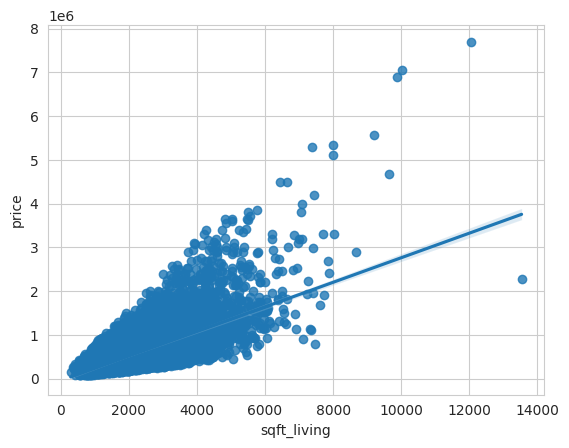

In [76]:
sns.regplot(x='sqft_living', y='price', data=casas)

En este ejemplo, vemos que la recta tiene una pendiente positiva, que nos indica que el valor medio de los edificios tiene relación con el número total de superficie habitable. Una pendiente negativa indicaría una correlación inversa y una pendiente cercana a cero (línea horizontal) nos indicaría que no hay correlación entre esas dos variables.

### Coeficiente de Pearson

La correlación de Pearson es la medida de cuán fuerte es una correlación. Nos da dos valores: El coeficiente de correlación y el P-value

- **Coeficiente de Correlación**: Nos muestra el grado de correlación entre dos variables. El rango de este coeficiente es [-1,1]. Si el valor se acerca a -1 nos indica que hay una fuerte correlación y que esta es negativa, si el valor es cercano a 1 es una correlación fuerte y positiva y si es 0 significa que no hay correlación.  

- **P-value**: Mide la probabilidad de obtener los resultados asumiendo que cierta hipótesis (nula) es cierta. Cuanto más bajo sea el p-value, mayor es el significado estadístico de la diferencia observada. En este caso, nos da la probabilidad de que dos distribuciones aleatorias produjeran en coeficiente de correlación obtenido.

Una correlación fuerte tiene que cumplir ambos criterios, un coeficiente cercano a 1 o -1 y un p-value lo más bajo posible.

Vamos a usar la función [`.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)de la librería Scipy que contiene herramientas y algoritmos matemáticos y vamos a ver lo fuerte o débil que es la correlación entre el número de habitaciones y el precio de los edificios del ejemplo anterior.

In [77]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(casas.price, casas.sqft_living)
print('Coeficiente de Pearson:', pearson_coef)
print('P-value:', p_value)

Coeficiente de Pearson: 0.7020350546117999
P-value: 0.0


NOTA: obtener un valor de 0 para el p-value, significa que es muy muy bajo (pero no será 0)

### Matriz de correlación
Para correlacionar más de dos variables, podemos utilizar una matriz de correlación, que muestra la correlación entre todas las variables, dos a dos.

Para crear la matriz de correlación de un Dataframe entero, podemos usar la función `.corr` de Pandas que, por defecto, calcula el coeficiente de correlación de Pearson pero también podemos especificar la utilización de otros métodos de correlación pasando un valor apropiado al parámetro `method`.

In [78]:
sub = casas.iloc[:,2:9]
sub

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0
21609,400000.0,4,2.50,2310,5813,2.0,0
21610,402101.0,2,0.75,1020,1350,2.0,0
21611,400000.0,3,2.50,1600,2388,2.0,0


In [79]:
correlation_mat = sub.corr()
correlation_mat

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000


Una forma visual de representar la matriz de correlación es usar un mapa de calor, en los que cada color representa un valor del coeficiente. Podemos crearlos usando la función `heatmap()` de Seaborn.

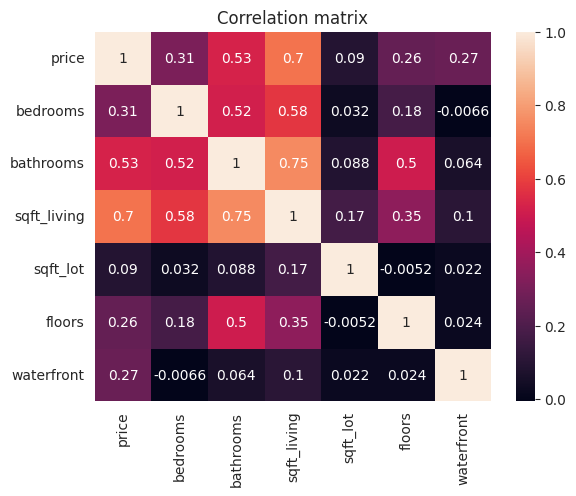

In [80]:
sns.heatmap(correlation_mat, annot = True)
plt.title('Correlation matrix');

Si nos fijamos, la diagonal de la matriz es todo 1s, que es la correlación de cada variable consigo misma. Obviamente, esta es máxima.

Y si buscamos el cruce entre `sqft_living` y `price`, encontramos el valor de 0.7 obtenido antes.

## Valores atípicos (outliers)
Un valor atípico o *outlier* es una observación que difiere de los datos que de otro modo estarían bien estructurados. Es un valor que numéricamente es muy distinto al resto de los datos, lo que puede afectar a nuestros datos. Por ejemplo, si tenemos datos de emisiones de CO2 de coches y uno de ellos resulta que tenía un problema de fábrica y emitía más.
Ese dato nos va a afectar a la media y a los cuartiles, y puede ser que queramos identificar ese dato para poder eliminarlo de nuestro dataset.

Es imprescindible conocer la naturaleza de nuestros datos para saber si tiene sentido eliminar outliers, y no supone pérdida importante de información.

A menudo, podemos identificar outliers a simple vista en un histograma, pero en los boxplots estos se muestran explícitamente.

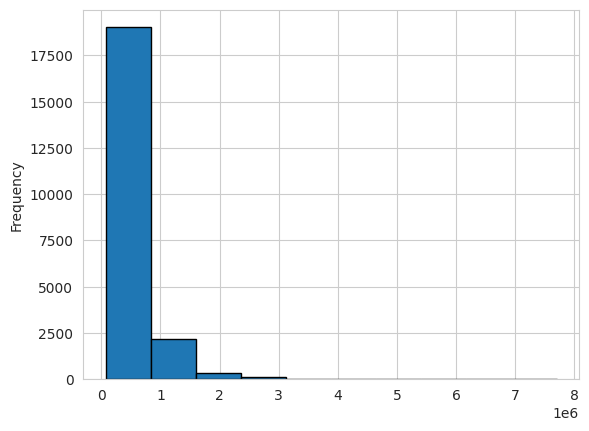

In [81]:
casas.price.plot(kind='hist',edgecolor='black', bins=10);

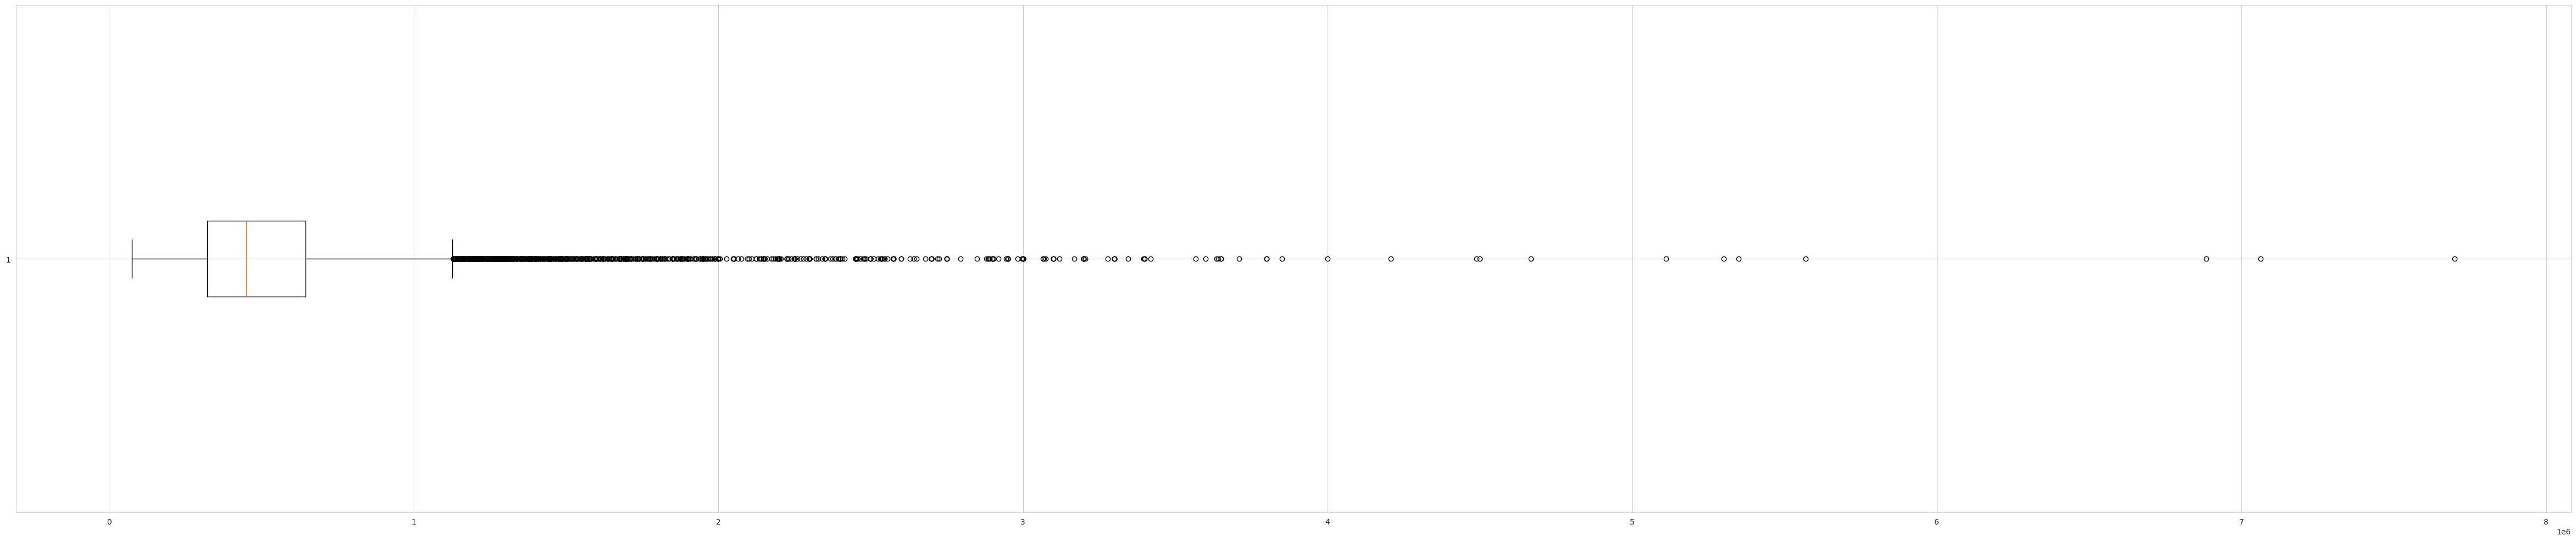

In [82]:
plt.figure(figsize=(60,12))
plt.boxplot(casas.price, vert=False);

Una manera programática de detectarlos es usar los Z-score que hemos visto con anterioridad. Si se alejan más de 3 deviaciones estándar de la media pueden considerarse outliers.

In [83]:
#Primero calculamos los Z-scores de la columna que nos interesa analizar.
ZS = stats.zscore(casas.price)

# Y nos quedamos con el valor absoluto
casas['abs_z_scores'] = np.abs(ZS)
precios = casas[['price', 'abs_z_scores']]
precios.head()

,price,abs_z_scores
0,221900.0,0.866717
1,538000.0,0.005688
2,180000.0,0.980849
3,604000.0,0.174090
4,510000.0,0.081958


In [84]:
precios[precios['price']>1000000].head()

,price,abs_z_scores
5,1225000.0,1.865641
21,2000000.0,3.976675
49,1350000.0,2.206131
69,1325000.0,2.138033
70,1040000.0,1.361717


In [85]:
# Seleccionamos las filas con un |Z-score| menor de 3
print('Num. registros total:', precios.shape[0])

new_precios = precios[precios['abs_z_scores'] < 3]
print('Num. registros sin outliers:', new_precios.shape[0])

Num. registros total: 21613
Num. registros sin outliers: 21207


O, recíprocamente, podemos quedarnos con los valores atípicos.

In [86]:
# Seleccionamos solo aquellos que tienen un Z-score mayor o igual de 3
outliers_precios = precios[precios['abs_z_scores'] >= 3]
print('Num. outliers:', outliers_precios.shape[0])
outliers_precios.head()

Num. outliers: 406


,price,abs_z_scores
21,2000000.0,3.976675
153,2250000.0,4.657654
246,2400000.0,5.066241
269,2900000.0,6.428198
282,2050000.0,4.112871


In [87]:
print(f"Precio medio de todas las casas: {precios['price'].mean():.0f}")
print(f"Precio medio de los outliers:   {outliers_precios['price'].mean():.0f}")

Precio medio de todas las casas: 540088
Precio medio de los outliers:   2276499
